In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [29]:
file = "/shares/wegner.ics.uzh/CHELSA/Switzerland/1981-2010_numpy/03_monthly_float16.npy"
ras = np.load(file)
ras.shape

(11, 245, 550)

In [5]:
import math
BS = [512, 1024, 2048, 4096, 8192]
for bs in BS:
    new_scaling = math.log(bs) * bs
    print(bs, new_scaling, new_scaling/bs)

512 3194.022208020228 6.238324625039508
1024 7097.82712893384 6.931471805599453
2048 15615.219683654448 7.6246189861593985
4096 34069.57021888243 8.317766166719343
8192 73817.40214091193 9.010913347279288


1.0 -0.605


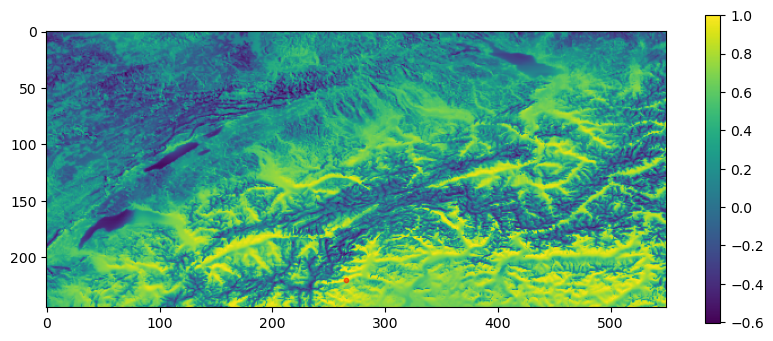

In [30]:
# Get value of a single pixel and get vect-product with every other location
y, x = 220, 265
pixel_val = ras[:, y, x].reshape(1,11)
sim = np.matmul(pixel_val, ras.transpose(1,2,0).reshape(245,550,11,1)).reshape(245, 550)
sim = sim/np.linalg.norm(pixel_val)
sim = sim/np.linalg.norm(ras, axis=0)
print(sim.max(), sim.min())

fig, ax = plt.subplots(figsize=(10, 4))
im = ax.imshow(sim)
ax.scatter([x], [y], c="red", alpha=0.5, s=10)
BS = 512
#rand_x = np.random.randint(0, 550, (BS))
#rand_y = np.random.randint(0, 220, (BS))
#ax.scatter(rand_x, rand_y, s=3)
fig.colorbar(im, ax=ax)
plt.show()

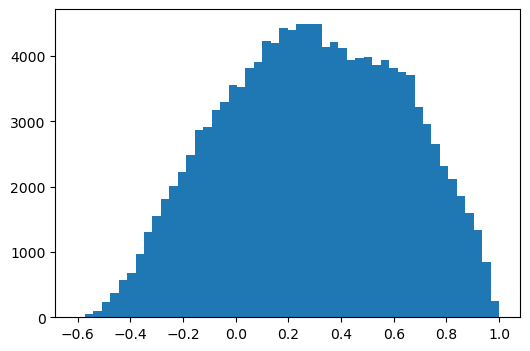

In [37]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(sim.reshape(-1), bins=50)
plt.savefig("./loc.png")
#plt.imsave("./loc.png", )

In [16]:
from sklearn.decomposition import PCA
import numpy as np
pca_128 = PCA(11).fit_transform(np.eye(128))

np.matmul(pca_128, np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])).shape

(128,)

In [1]:
import rioxarray
import numpy as np
ras = rioxarray.open_rasterio('/shares/wegner.ics.uzh/CHELSA/climatologies/1981-2010/cmi/CHELSA_cmi_01_1981-2010_V.2.1.tif', cache=False)
NW_y, NW_x = (4340, 22310)
SE_y, SE_x = (4585, 22860)
ras = ras[0,NW_y:SE_y,NW_x:SE_x]
np.array(ras["y"]).shape

(245,)